# Chapter 10. Introduction to Artificial Neural Networks with Keras

### Perceptrons
= smallest ANN structure, they are based on a threshold unit
- they compute z, which is basically a linear input function and transform it using the _activation function_ to an output h
- each perceptron is able to handle a linear reg/clf task
- multilayer perceptron are already able to handle multi degree polynomial problems
### Backpropagation
= iterative process to train a MLP (usually referred to as an ANN)
- weights of each perceptron and biases are initialized randomly
One iteration contains the following steps:
- a batch of datasets is fed to the NN and the resulting error calculated
- using the chain rule, the algorithm computes the contribution of each weight and each bias to the error
- the process thereby determines the error gradient throughout the whole construct
- finally performs a gradient descent steps with all weights and biases
### Loss functions for NN compiling
- sparse_categorical_crossentropy if we only deal with exclusive classes as labels e.g. [3]
- categorical_crossentropy if we receive one-hot-vectors as labels e.g. [0.,0.,0.,1.0,0.,0.,0.,0.,0.,]
- binary_crossentropy for binary classification problems (and sigmoid instead of softmax as activation)


## Regression MLPs

In [31]:
from sklearn.datasets import fetch_california_housing
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split
from sklearn.neural_network import MLPRegressor
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)


In [32]:
mlp_reg = MLPRegressor(hidden_layer_sizes=[50,50,50],random_state=42,max_iter=1000)
pipeline = make_pipeline(StandardScaler(),PCA(n_components=0.9999),mlp_reg)
pipeline.fit(X_train,y_train)
y_pred = pipeline.predict(X_valid)
rmse = mean_squared_error(y_valid,y_pred,squared=False)
display(rmse)

0.5124867806385482

# Let's f*ck Sklearn's MLP/NN API and move on to Keras

In [19]:
import tensorflow as tf
import keras
from keras.datasets import fashion_mnist

import matplotlib.pyplot as plt 
import random as rd
import numpy as np

classes = ["T-Shirt","Trouser","Pullover","Dress","Coat","Sandal","Shirt","Sneaker","Bag","Ankle Boot"]

(X_train_full, y_train_full), (X_test, y_test) = fashion_mnist.load_data()
X_train, y_train = X_train_full[:-5000], y_train_full[:-5000]
X_valid, y_valid = X_train_full[-5000:], y_train_full[-5000:]

def plot_digits(X, y):
    fig, axes = plt.subplots(4, 4, figsize=(6, 6))
    indices = rd.sample(range(X.shape[0]), 16)
    for i, ax in enumerate(axes.flat):
        image_array = np.array(X[indices[i]])
        digit_array = image_array.reshape(28, 28)
        # negative_array = 255 - digit_array  # Compute negative of the image
        ax.imshow(digit_array, cmap="binary")
        ax.axis("off")
        ax.set_title("Label: {}".format(classes[y[indices[i]]]))

    plt.tight_layout()
    plt.show()

# plot_digits(X_train_full, y_train_full)

def NN_model(X,y,epochs,X_val,y_val):
    from sklearn.preprocessing import StandardScaler
    keras.backend.clear_session()
    model = keras.Sequential([
        # keras.layers.Dense(X.shape[1],activation="relu"),
        keras.layers.Flatten(input_shape=[X.shape[1],X.shape[2]]),
        keras.layers.Dense(300,activation="relu"),
        keras.layers.Dense(100,activation="relu"),
        keras.layers.Dense(10,activation="softmax"),
    ])
    
    model.compile(loss="sparse_categorical_crossentropy",optimizer="sgd",metrics=["accuracy"])
    history = model.fit(X,y,epochs=epochs,validation_data=(X_val,y_val))
    return history, model


X_train, X_valid = X_train/255., X_valid/255. # scaling that data by hand
print("X train Shape before PCA: ",X_train.shape)
print("X valid Shape before PCA: ",X_valid.shape)
"""from sklearn.decomposition import PCA
pca95_train = PCA(n_components=0.95)
X_train, X_valid = X_train.reshape(X_train.shape[0], -1), X_valid.reshape(X_valid.shape[0], -1)
print("X train Shape after flattening: ",X_train.shape)
print("X valid after flattening: ",X_valid.shape)
X_train = pca95_train.fit_transform(X_train)
pca95_valid_test = PCA(n_components=X_train.shape[1])
X_valid = pca95_valid_test.fit_transform(X_valid)
print("X train Shape after PCA: ",X_train.shape)
print("X valid after PCA: ",X_valid.shape)"""

history,model = NN_model(X_train,y_train,epochs=30,X_val=X_valid,y_val=y_valid)

X train Shape before PCA:  (55000, 28, 28)
X valid Shape before PCA:  (5000, 28, 28)
Epoch 1/30
1719/1719 [==============================] - 3s 2ms/step - loss: 0.7183 - accuracy: 0.7653 - val_loss: 0.5078 - val_accuracy: 0.8280
Epoch 2/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4889 - accuracy: 0.8294 - val_loss: 0.4491 - val_accuracy: 0.8370
Epoch 3/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4426 - accuracy: 0.8468 - val_loss: 0.4219 - val_accuracy: 0.8508
Epoch 4/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.4154 - accuracy: 0.8555 - val_loss: 0.4046 - val_accuracy: 0.8606
Epoch 5/30
1719/1719 [==============================] - 2s 1ms/step - loss: 0.3952 - accuracy: 0.8623 - val_loss: 0.4067 - val_accuracy: 0.8486
Epoch 6/30
1719/1719 [==============================] - 3s 1ms/step - loss: 0.3778 - accuracy: 0.8683 - val_loss: 0.3829 - val_accuracy: 0.8598
Epoch 7/30
1719/1719 [=============================

In [21]:
display(type(model))
display(type(history))

keras.engine.sequential.Sequential

keras.callbacks.History

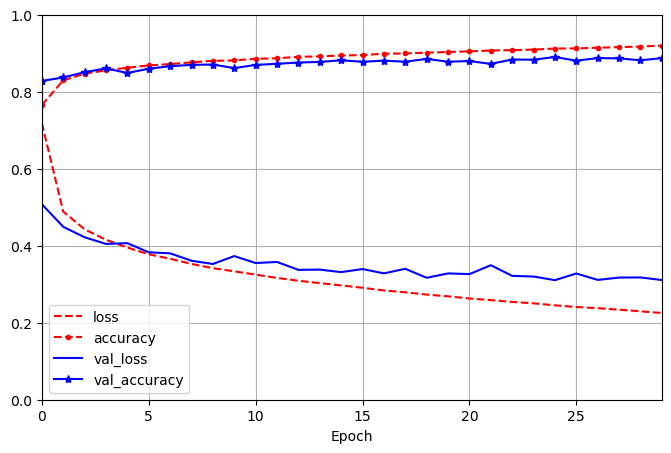

In [22]:
import matplotlib.pyplot as plt
import pandas as pd
pd.DataFrame(history.history).plot(figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",style=["r--", "r--.", "b-", "b-*"])
plt.show()

In [23]:
display(model.evaluate(X_test/255., y_test))
y_proba = model.predict(X_test[:3]).round(2)
y_proba

313/313 [==============================] - 0s 1ms/step - loss: 0.3284 - accuracy: 0.8799


[0.3283713161945343, 0.8798999786376953]

1/1 [==============================] - 0s 67ms/step


array([[0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 1., 0., 0., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

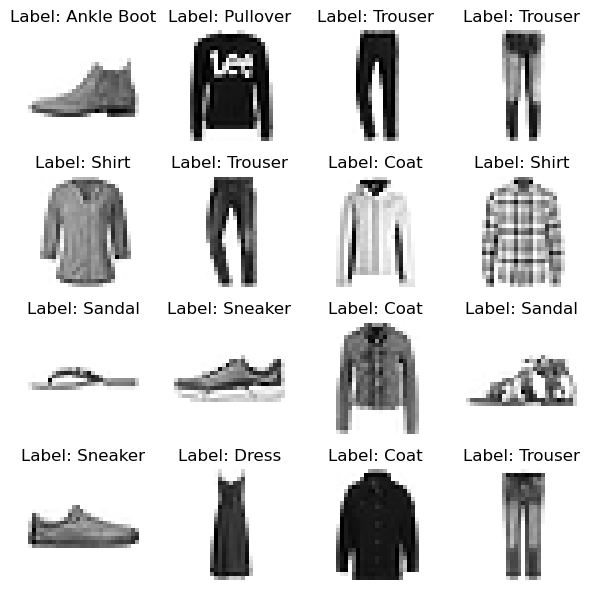

In [26]:
def plot_digits1(X, y, random=False):
    fig, axes = plt.subplots(4, 4, figsize=(6, 6))
    if random==True:
        indices = rd.sample(range(X.shape[0]), 16)
    else:
        indices = range(16)
    for i, ax in enumerate(axes.flat):
        image_array = np.array(X[indices[i]])
        digit_array = image_array.reshape(28, 28)
        # negative_array = 255 - digit_array  # Compute negative of the image
        ax.imshow(digit_array, cmap="binary")
        ax.axis("off")
        ax.set_title(f"Label: {classes[y[indices[i]]]}")

    plt.tight_layout()
    plt.show()

plot_digits1(X_test,y_test)

In [28]:
y_pred = np.array(classes)[y_proba.argmax(axis=-1)]
y_pred

array(['Ankle Boot', 'Pullover', 'Trouser'], dtype='<U10')

### Building a Regression MLP Using the Sequential API


In [33]:
tf.random.set_seed(42)
norm_layer =  tf.keras.layers.Normalization(input_shape=X_train.shape[1:])

housing = fetch_california_housing()
X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)
norm_layer = tf.keras.layers.Normalization(input_shape=X_train.shape[1:])
model = tf.keras.Sequential([
    norm_layer,
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(1)
])

model.compile(loss="mse", optimizer=tf.keras.optimizers.Adam(learning_rate=1e-3), metrics=["RootMeanSquaredError"])
norm_layer.adapt(X_train)
history = model.fit(X_train, y_train, epochs=20,validation_data=(X_valid, y_valid))
mse_test, rmse_test = model.evaluate(X_test, y_test)
X_new = X_test[:3]
y_pred = model.predict(X_new)



Epoch 1/20
363/363 [==============================] - 1s 2ms/step - loss: 0.7647 - root_mean_squared_error: 0.8745 - val_loss: 0.3684 - val_root_mean_squared_error: 0.6070
Epoch 2/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3748 - root_mean_squared_error: 0.6122 - val_loss: 2.4371 - val_root_mean_squared_error: 1.5611
Epoch 3/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3691 - root_mean_squared_error: 0.6075 - val_loss: 0.3779 - val_root_mean_squared_error: 0.6147
Epoch 4/20
363/363 [==============================] - 1s 2ms/step - loss: 0.3419 - root_mean_squared_error: 0.5847 - val_loss: 1.0208 - val_root_mean_squared_error: 1.0104
Epoch 5/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3319 - root_mean_squared_error: 0.5761 - val_loss: 1.2207 - val_root_mean_squared_error: 1.1048
Epoch 6/20
363/363 [==============================] - 1s 1ms/step - loss: 0.3368 - root_mean_squared_error: 0.5804 - val_loss: 0.4260 - val_

### Tuning Neural Network Hyperparameters


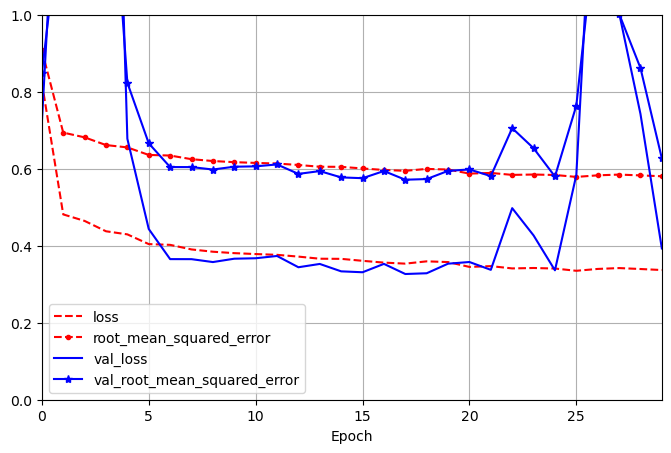

In [43]:
pd.DataFrame(history.history).plot(figsize=(8, 5), xlim=[0, 29], ylim=[0, 1], grid=True, xlabel="Epoch",style=["r--", "r--.", "b-", "b-*"])
plt.show()

## Solutions to exercises
3.  Most probably it is because one can solve logistic regression by using a concise formula, while
    perceptrons require algorithmic training.
4.  Because it is differentiatable at all points compared to a simple step function
5.  tanh, sigmoid, relu, softmax
6.  a. Input matrix is [m,10]
    b. W_h [10,50] b_h [50]
    c. W_o [50,3] b_o [3]
    d. Y [m,3]
    e. Y = X(W_h+b_h)*(W_o+b_o)
7.  Spam vs Ham: 1 neuron
    Output layer function: either tanh, sigmoid, or step
    Output: 10 neurons, activation: sigmoid or tanh
    Regressions, like the housing price predictions require 1 neuron
8.  First, a mini batch of training data is passed through the network and the error is calculated. 
    Secondly, the individual contribution of each weight and bias to the error is calculated using the chain rule.
    Finally, the gradient of each weight and bias is used to determine the tweak in those model parameters in order to
    lower the error. This process is iterated until the algorithm converges.
9.  Learning rate
    Optimizer
    Callbacks
    Number of layers x number of neurons per layer x their activation function
    batch size
    max epochs

Epoch 1/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.2879 - accuracy: 0.9119 - val_loss: 0.1774 - val_accuracy: 0.9482
Epoch 2/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.1375 - accuracy: 0.9588 - val_loss: 0.1335 - val_accuracy: 0.9599
Epoch 3/100
1313/1313 [==============================] - 2s 2ms/step - loss: 0.1062 - accuracy: 0.9676 - val_loss: 0.1371 - val_accuracy: 0.9602
Epoch 4/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0852 - accuracy: 0.9732 - val_loss: 0.1242 - val_accuracy: 0.9648
Epoch 5/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0704 - accuracy: 0.9777 - val_loss: 0.1271 - val_accuracy: 0.9643
Epoch 6/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0626 - accuracy: 0.9807 - val_loss: 0.1313 - val_accuracy: 0.9642
Epoch 7/100
1313/1313 [==============================] - 3s 2ms/step - loss: 0.0513 - accuracy: 0.9831 - val_loss: 0.1355 - val_ac

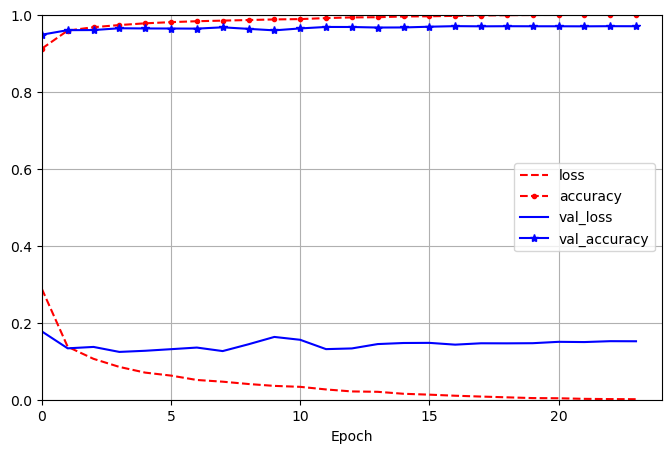

In [207]:
# 10. Train a deep MLP on the MNIST dataset. goal 98% accuracy

tf.keras.backend.clear_session()

mnist = tf.keras.datasets.mnist.load_data()

(X_train_full, y_train_full),(X_test,y_test) = mnist

X_train_full, X_test = X_train_full / 255., X_test / 255.

#print(y_train_full[:16])
def plot_mnist_digits1(X, y, random=False):
    fig, axes = plt.subplots(4, 4, figsize=(6, 6))
    if random==True:
        indices = rd.sample(range(X.shape[0]), 16)
    else:
        indices = range(16)
    for i, ax in enumerate(axes.flat):
        image_array = np.array(X[indices[i]])
        digit_array = image_array.reshape(28, 28)
        # negative_array = 255 - digit_array  # Compute negative of the image
        ax.imshow(digit_array, cmap="binary")
        ax.axis("off")
        ax.set_title(f"Label: {y[i]}")

    plt.tight_layout()
    plt.show()
#plot_mnist_digits1(X_train_full,y_train_full,random=False)


from keras.callbacks import EarlyStopping

model = tf.keras.Sequential([
    tf.keras.layers.Flatten(input_shape=(28,28)),
    tf.keras.layers.Dense(50, activation="relu"),
    tf.keras.layers.Dense(10,activation="softmax")
])

early_stopping_cb = EarlyStopping(patience=20, monitor='val_loss', restore_best_weights=True)
checkpoint_cb = tf.keras.callbacks.ModelCheckpoint("my_mnist_model", save_best_only=True)

optimizer = tf.keras.optimizers.SGD(learning_rate=3e-1)

model.compile(loss="sparse_categorical_crossentropy", optimizer=optimizer, metrics=["accuracy"])
history = model.fit(X_train_full, y_train_full, epochs=100,validation_split=0.3,callbacks=[checkpoint_cb,early_stopping_cb])


num_epochs_used = early_stopping_cb.stopped_epoch + 1
pd.DataFrame(history.history).plot(figsize=(8, 5), xlim=[0, num_epochs_used], ylim=[0, 1], grid=True, xlabel="Epoch",style=["r--", "r--.", "b-", "b-*"])
plt.show()

313/313 [==============================] - 1s 2ms/step - loss: 0.1061 - accuracy: 0.9692
[[2.6260103e-08 2.4907610e-08 1.2580994e-06 4.3304221e-06 7.3973133e-10
  6.6543890e-09 3.4675453e-11 9.9990124e-01 6.9575222e-08 9.3059112e-05]
 [7.1448532e-08 2.6490765e-05 9.9983025e-01 1.4291535e-04 6.2191927e-12
  2.4086310e-08 2.1394215e-09 1.0122187e-10 7.0860615e-08 5.7928801e-12]
 [5.9553059e-07 9.9288297e-01 5.9134042e-04 7.9628204e-05 1.9213700e-04
  5.3326462e-06 1.6956717e-05 3.7062424e-03 2.5113230e-03 1.3432096e-05]]
[7 2 1]


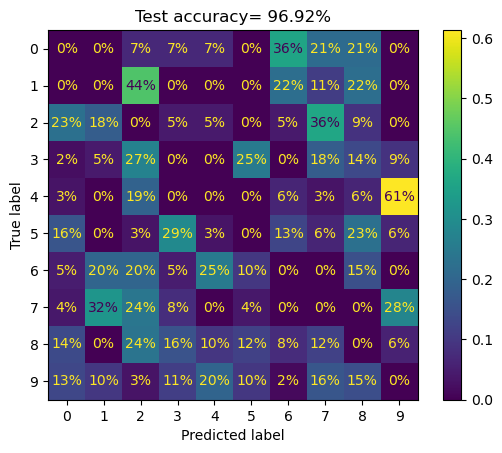

In [208]:
from sklearn.metrics import confusion_matrix as cm
from sklearn.metrics import ConfusionMatrixDisplay
y_proba = model.predict(X_test)
y_pred = y_proba.argmax(axis=-1)
loss,accuracy = model.evaluate(X_test, y_test)
print(y_proba[:3])
print(y_pred[:3])

exclude = (y_pred != y_test)
ConfusionMatrixDisplay.from_predictions(y_test, y_pred,sample_weight=exclude,normalize="true",values_format=".0%")
plt.title(f"Test accuracy= {round(accuracy*100,2)}%")


plt.show()
